# Proyecto #1: Notebook Diabetes

# Estudiantes
    John Sánchez Cespedes 3021080092
    Luis Carlos Navarro Todd 2022212158
    Victoria Sandí Barrantes 2022146536

## Imports

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

## 1. Análisis Exploratorio de Datos (EDA) y Preprocessing

In [40]:
ds = pd.read_csv("./diabetes.csv")
ds.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Exploración Estadística de los datos
Antes de hacer cualquier exploración y seguir trabajando con un dataset es importante que el dataset en general tenga datos con cierto sentido, por lo tanto observar la media, los mínimos, los máximos y los cuartiles puede generar una idea inicial.

In [41]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


En este caso, se pueden observar bastantes outliers como un un nivel de insulina de 800. Muy por arriba de los valores de los cuartiles y de la media. Además hay varios mínimos en 0, como el BMI, Insulina, Presión, etc... que no son médicamente posibles.

### Valores faltantes
Para manejar los valores faltantes en la glucosa, presión, grosor de piel, insulina y BMI se utilizará una función que compare la media de cada variable dependiendo de la salida (0 o 1). Además se marcaran los valores inválidos como nulos.

In [42]:
ds[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = ds[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

In [43]:
ds.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Se puede observar cómo hay varios datos faltantes.

In [44]:
def median_target(var):   
    temp = ds[ds[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

#### Glucosa

In [45]:
median_target('Glucose')

,Outcome,Glucose
0,0,107.0
1,1,140.0


Se utilizará 107 para la gente sin diabetes y 140 para la gente con diabetes.

In [46]:
ds.loc[(ds['Outcome'] == 0 ) & (ds['Glucose'].isnull()), 'Glucose'] = 102.5
ds.loc[(ds['Outcome'] == 1 ) & (ds['Glucose'].isnull()), 'Glucose'] = 169.5

#### Presión

In [51]:
median_target('BloodPressure')

,Outcome,BloodPressure
0,0,70.0
1,1,74.5


Se utilizará 70 para la gente sin diabetes y 74.5 para la gente con diabetes.

In [48]:
ds.loc[(ds['Outcome'] == 0 ) & (ds['BloodPressure'].isnull()), 'BloodPressure'] = 70.0
ds.loc[(ds['Outcome'] == 1 ) & (ds['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

#### Grosor de Piel

In [49]:
median_target('SkinThickness')

,Outcome,SkinThickness
0,0,27.0
1,1,32.0


Se utilizará 27 para la gente sin diabetes y 32 para la gente con diabetes.

In [50]:
ds.loc[(ds['Outcome'] == 0 ) & (ds['SkinThickness'].isnull()), 'SkinThickness'] = 27.0
ds.loc[(ds['Outcome'] == 1 ) & (ds['SkinThickness'].isnull()), 'SkinThickness'] = 32.0

#### Insulina

In [52]:
median_target('Insulin')

,Outcome,Insulin
0,0,102.5
1,1,169.5


Se utilizará 102.5 para la gente sin diabetes y 169.5 para la gente con diabetes.

In [53]:
ds.loc[(ds['Outcome'] == 0 ) & (ds['Insulin'].isnull()), 'Insulin'] = 102.5
ds.loc[(ds['Outcome'] == 1 ) & (ds['Insulin'].isnull()), 'Insulin'] = 169.5

#### BMI

In [54]:
median_target('BMI')

,Outcome,BMI
0,0,30.1
1,1,34.3


Se utilizará 30.1 para la gente sin diabetes y 34.3 para la gente con diabetes.

In [55]:
ds.loc[(ds['Outcome'] == 0 ) & (ds['BMI'].isnull()), 'BMI'] = 30.1
ds.loc[(ds['Outcome'] == 1 ) & (ds['BMI'].isnull()), 'BMI'] = 34.3

#### Después de limpieza de nulos

In [56]:
ds.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [57]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.736328,30.557251,44.000,99.75000,117.0000,141.00000,199.00
BloodPressure,768.0,72.389323,12.106039,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,29.089844,8.890820,7.000,25.00000,28.0000,32.00000,99.00
Insulin,768.0,141.753906,89.100847,14.000,102.50000,102.5000,169.50000,846.00
BMI,768.0,32.434635,6.880498,18.200,27.50000,32.0500,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Outliers restantes

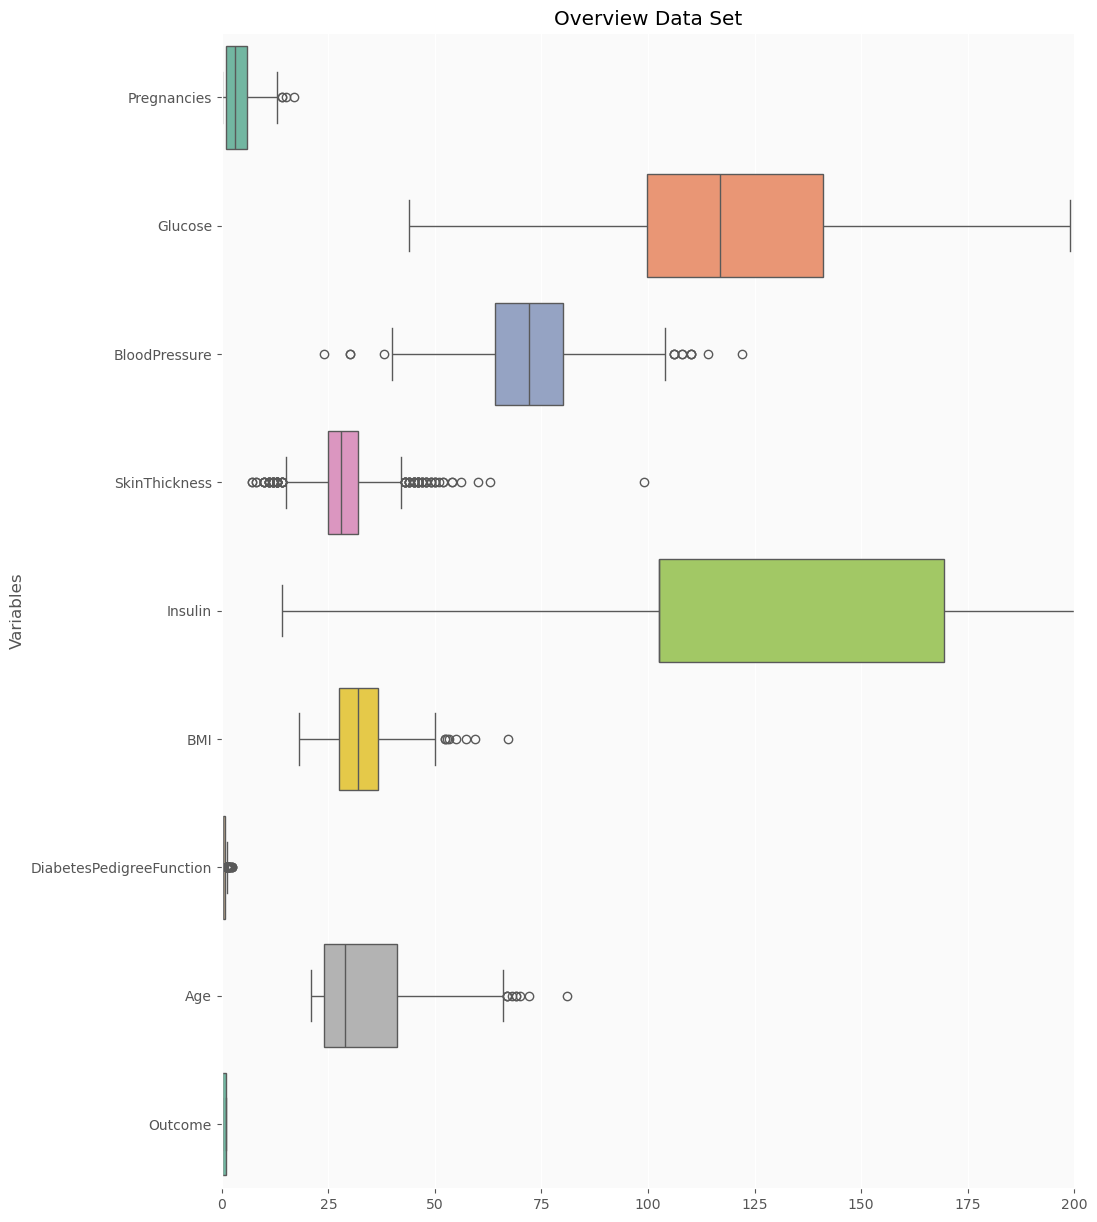

In [58]:
plt.style.use('ggplot') # Using ggplot2 style visuals 

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(ds, 
  orient = 'h', 
  palette = 'Set2')



## Estandarizacion de datos

## Dataframe

In [83]:
columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']

ds = pd.DataFrame(data=ds, columns=columns)
ds.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Division de los datos

In [86]:
X = ds.drop(["Outcome"], axis=1)
y = ds["Outcome"]

#Estandarizacion
sc = StandardScaler()
X = sc.fit_transform(X)

# Normalizar
normalizer = Normalizer()
X = normalizer.fit_transform(X)

# Divide en entrenamiento (80%) y el resto (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)
print(y_train)

603    1
118    0
247    0
157    0
468    1
      ..
763    0
192    1
629    0
559    0
684    0
Name: Outcome, Length: 614, dtype: int64


## Modelo Scikit learn

In [ ]:
# Inicializar el modelo de regresión logística
lgModel = LogisticRegression(random_state=42)

# Ajustar el modelo al conjunto de entrenamiento
lgModel.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = lgModel.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
informe_clasificacion = classification_report(y_test, y_pred)

# Imprimir resultados
print(f'Accuracy del modelo: {accuracy:.2f}')
print('\nInforme de clasificación:')
print(informe_clasificacion)

Accuracy del modelo: 0.77

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       107
           1       0.64      0.57      0.61        47

    accuracy                           0.77       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.77      0.77      0.77       154

